In [88]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_flux/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [89]:
pot_data = 8.649e+18

outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
#RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");


# check flux histograms

In [90]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [91]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [92]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histos_corr/'
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/tmp/'
f_flux = ROOT.TFile.Open(path+"Tot_All_fluxhisto.root", 'read')
#f_flux = ROOT.TFile.Open(path+"fluxreader.root_histo.root", 'read')


In [93]:
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]


In [94]:
h_cv = f_flux.Get("numu/numu_CV_FV_TPC")
h_flux_var0 = f_flux.Get('numu/'+weight_list_flux[0]\
                                +'/Active_TPC_Volume/numu_'+weight_list_flux[0]\
                                +'_Uni_'+str(1)+'_FV_TPC')

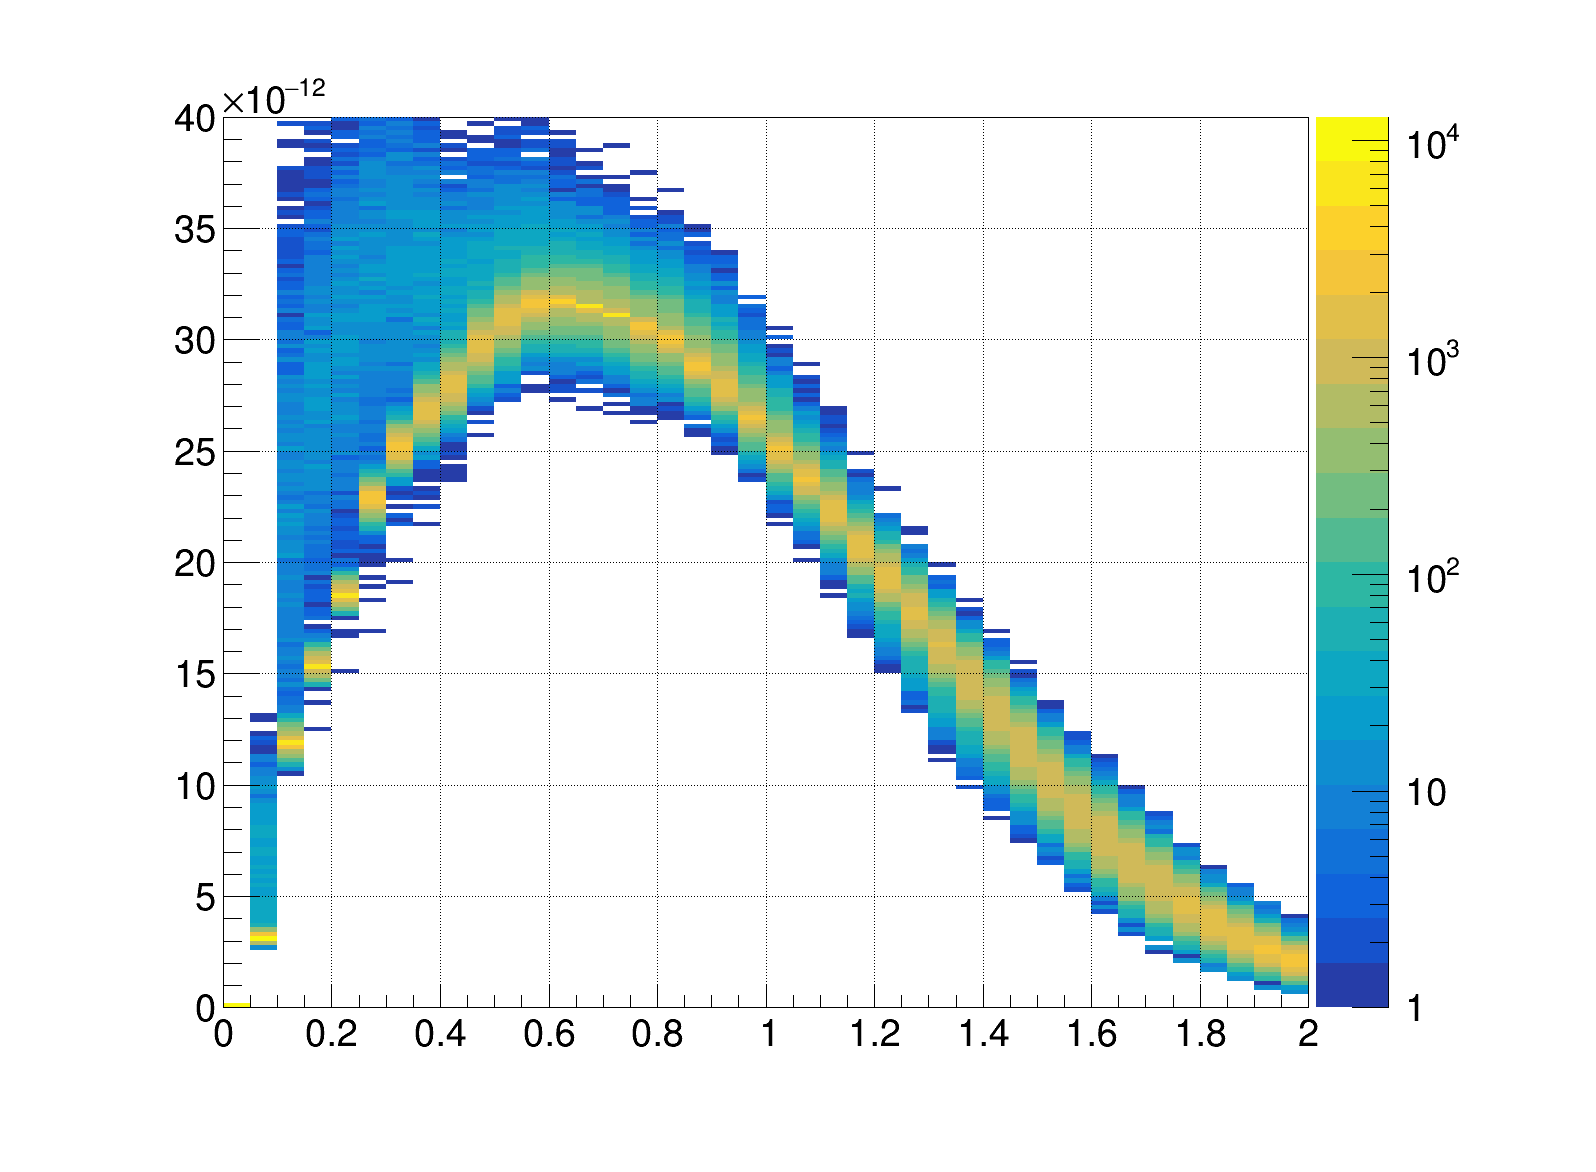

In [170]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histos_corr/'
f_flux = ROOT.TFile.Open(path+"Tot_All_fluxhisto.root", 'read')
h_cv = f_flux.Get("numu/numu_CV_AV_TPC")
h_cv.Scale(1.0/(NumberOfFiles*POT_file*active_Area))
xbin = 40
xstart = 0.0
xend = 10.0/5
ybin = 200
ystart = 0.0
yend = 0.4e-10

NumberOfFiles = 4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 236.35 * 213.0
active_Area = 128.175*2*116.5*2


h_col2 = ROOT.TH2D('h_col2','h_col2',xbin,xstart,xend,ybin,ystart,yend)

'''for i in range(200):
    val = h_cv.GetBinContent(i)
    h_col2.Fill(i*xend/xbin,val)  
h_col2.Draw('colz')
c1.Draw()
'''
for para in range(num_para):
    for uni in range(13,num_universes):
        h_flux_var = f_flux.Get('numu/'+weight_list_flux[para]\
                                +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
                                +'_Uni_'+str(uni)+'_AV_TPC')
        h_flux_var.Scale(1.0/(NumberOfFiles*POT_file*active_Area))
        for i in range(40):
            h_col2.Fill(i*xend/xbin,h_flux_var.GetBinContent(i)) 
h_col2.Draw('colz')
c1.Draw()


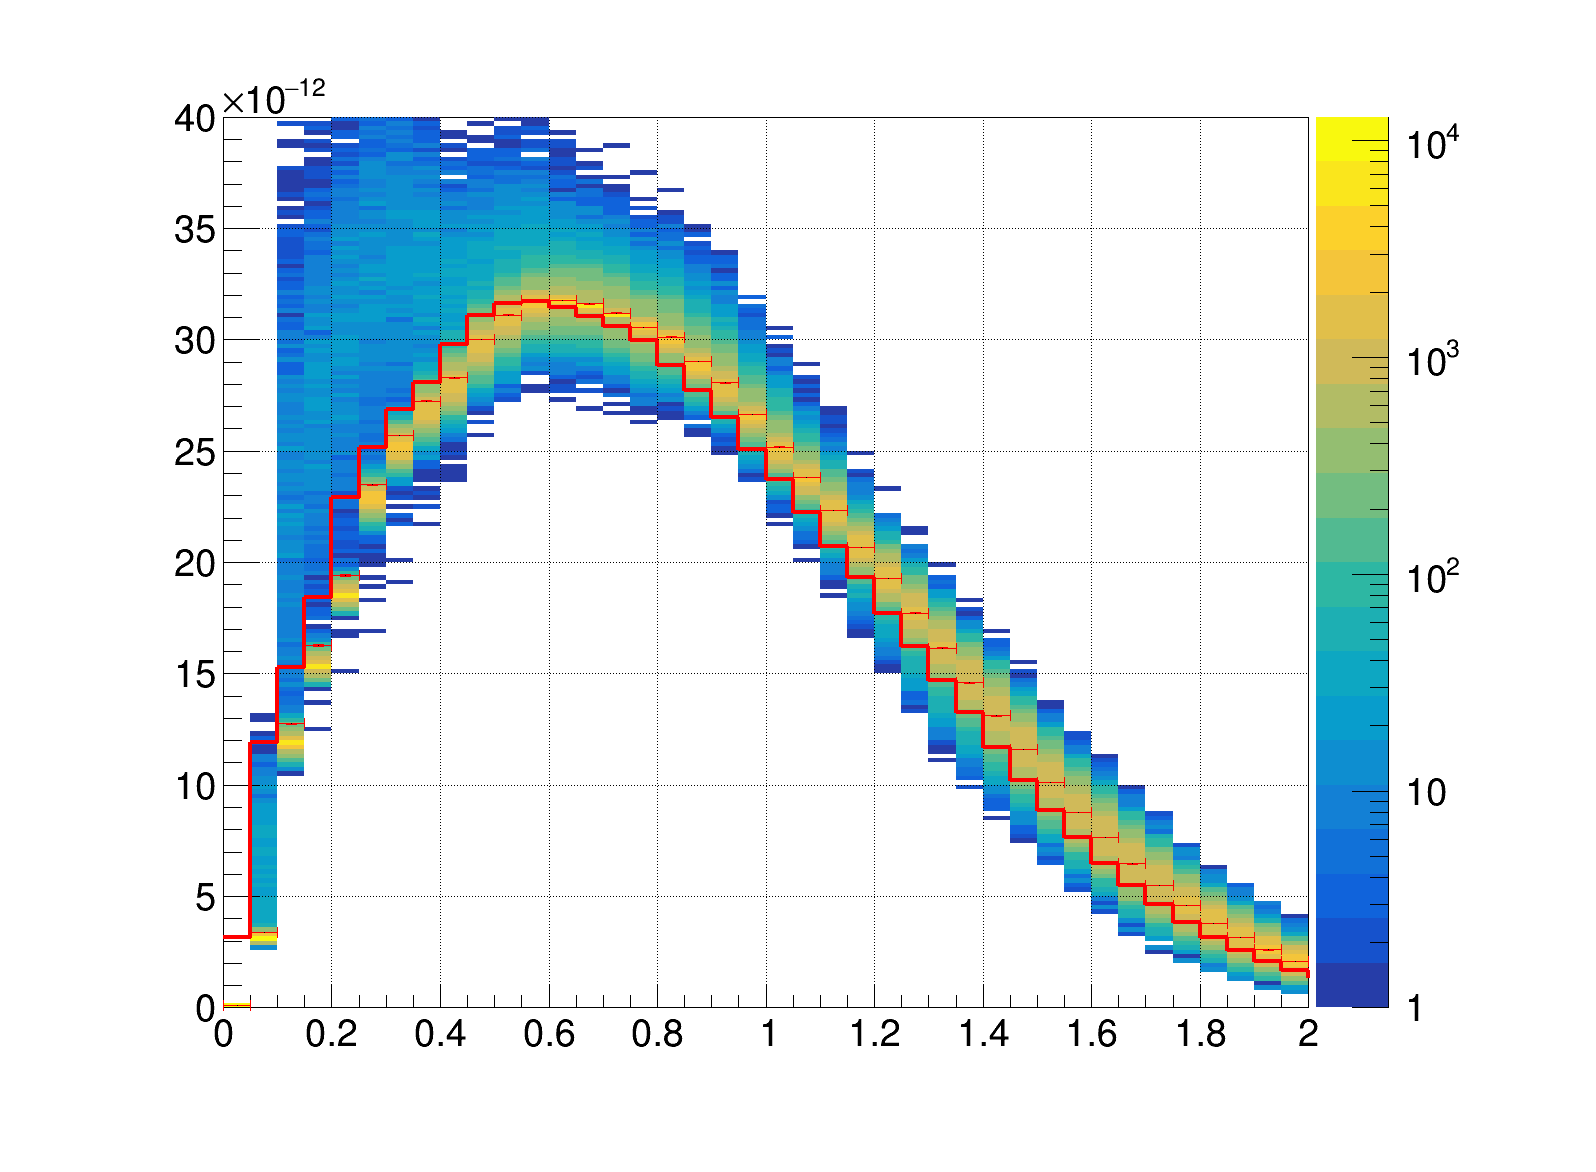

In [171]:
h_col2.Draw('colz')

h_prof = h_col2.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
ROOT.gStyle.SetEndErrorSize(5)
#h_prof.SetFillStyle(3001);
h_prof.SetFillColor(2);
h_prof.Draw('E1 same')
h_cv.SetLineWidth(4)
h_cv.SetLineColor(2)
h_cv.Draw('Hist same')
c1.SetLogz(1)
c1.Draw()
#for i in range(1,40):
#    print i*0.050,'\t',  h_prof.GetBinError(i)/h_prof.GetBinContent(i),'\t',h_prof.GetBinContent(i)

MeV:  50  flux: 3.16e-12  fratcional difference: 0.698  std: 0.698  sigma: 1.250
MeV:  100  flux: 1.19e-11  fratcional difference: 0.491  std: 0.491  sigma: 1.046
MeV:  150  flux: 1.53e-11  fratcional difference: 0.323  std: 0.323  sigma: 0.857
MeV:  200  flux: 1.84e-11  fratcional difference: 0.260  std: 0.260  sigma: 0.689
MeV:  250  flux: 2.29e-11  fratcional difference: 0.215  std: 0.215  sigma: 0.471
MeV:  300  flux: 2.52e-11  fratcional difference: 0.182  std: 0.182  sigma: 0.363
MeV:  350  flux: 2.69e-11  fratcional difference: 0.149  std: 0.149  sigma: 0.261
MeV:  400  flux: 2.81e-11  fratcional difference: 0.125  std: 0.125  sigma: 0.186
MeV:  450  flux: 2.98e-11  fratcional difference: 0.117  std: 0.117  sigma: 0.153
MeV:  500  flux: 3.11e-11  fratcional difference: 0.113  std: 0.113  sigma: 0.136
MeV:  550  flux: 3.16e-11  fratcional difference: 0.100  std: 0.100  sigma: 0.119
MeV:  600  flux: 3.17e-11  fratcional difference: 0.097  std: 0.097  sigma: 0.104
MeV:  650  flux: 

"for i in range(1,60+1):\n    flux_cv = h_cv.Integral(i,i+1)\n    #flux_cv = flux_cv/(NumberOfFiles*POT_file*fidVol_Area)*20\n    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i))\n    #print ' - MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.GetBinContent(i+1))\n"

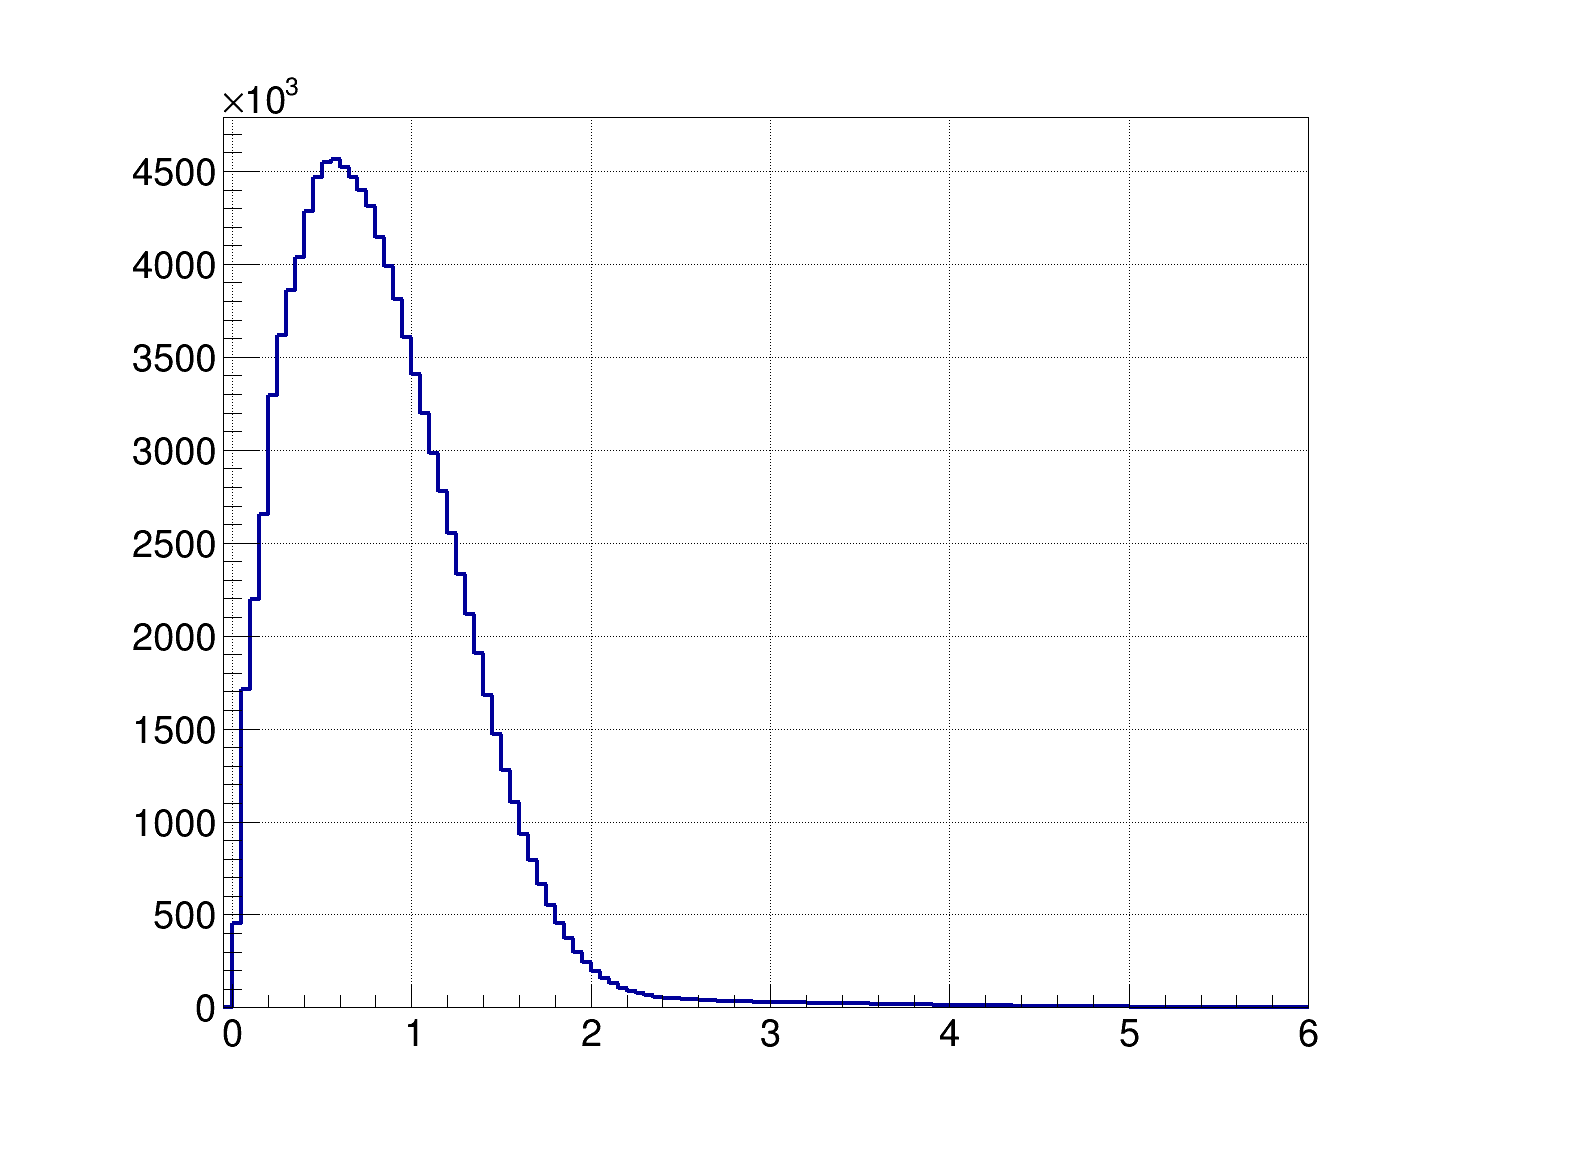

In [101]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histos_corr/'
f_flux = ROOT.TFile.Open(path+"Tot_All_fluxhisto.root", 'read')
h_cv = f_flux.Get("numu/numu_CV_AV_TPC")
h_flux_var0 = f_flux.Get('numu/'+weight_list_flux[0]\
                                +'/Active_TPC_Volume/numu_'+weight_list_flux[0]\
                                +'_Uni_'+str(1)+'_FV_TPC')
NumberOfFiles = 4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 236.35 * 213.0
active_Area = 128.175*2*116.5*2
#h_cv.Scale(1/(NumberOfFiles*POT_file*active_Area))
h_cv.Draw()
h_cv.GetXaxis().SetRange(0,120);
h_cv.SetLineWidth(4)
c1.Draw()


num_universes = 1000
flux_tot = np.zeros((num_para,num_universes))
for i in range(1,60+1):
    flux_var = np.zeros((num_para,num_universes))
    flux_cv = h_cv.Integral(i,i)
    tot_err = 0.0
    tot_std = 0.0
    tot_para = 0.0
    for para in range(num_para):
        flux_varp = np.zeros((num_universes))
        flux_sigma_para = 0.0
        for uni in range(num_universes):
            h_flux_var = f_flux.Get('numu/'+weight_list_flux[para]\
                                +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
                                +'_Uni_'+str(uni)+'_AV_TPC')
            #h_flux_var.Scale(1.0/(NumberOfFiles*POT_file*active_Area))
            flux_var = h_flux_var.Integral(i,i)#/(NumberOfFiles*POT_file*active_Area)
            flux_varp[uni] = flux_var - flux_cv
            flux_tot[para][uni] = flux_var
            flux_sigma_para = flux_sigma_para+ (flux_var - flux_cv)*(flux_var - flux_cv)
            
        para_err = np.std(flux_varp)
        para_std = np.std(flux_tot[para])
        #print para_err
        #print para_err/flux_cv
        tot_err = tot_err + para_err*para_err
        tot_std = tot_std + para_std*para_std
        tot_para = tot_para + flux_sigma_para/num_universes
        
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i)/(NumberOfFiles*POT_file*active_Area)),\
        ' fratcional difference: {0:0.3f}'.format(math.sqrt(tot_err)/h_cv.Integral(i,i)),\
        ' std: {0:0.3f}'.format(math.sqrt(tot_std)/h_cv.Integral(i,i)),\
        ' sigma: {0:0.3f}'.format(math.sqrt(tot_para)/h_cv.Integral(i,i))
        

'''for i in range(1,60+1):
    flux_cv = h_cv.Integral(i,i+1)
    #flux_cv = flux_cv/(NumberOfFiles*POT_file*fidVol_Area)*20
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i))
    #print ' - MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.GetBinContent(i+1))
'''

In [96]:
flux = h_cv.Integral(0,201)


In [97]:
print flux

106086498.0


In [98]:
NumberOfFiles = 4815.0
POT_file = 5e8
pot_data = 8.649e+18
fidVol_Area = 236.35 * 213.0

flux_per_POT = flux / (NumberOfFiles*POT_file)
Tot_flux_woArea = flux_per_POT*pot_data
Tot_flux = Tot_flux_woArea/fidVol_Area

In [86]:
print 'Total flux: {0:0.5e}'.format(flux)
print 'Total POT: {0:0.5e}'.format(4815*POT_file)
print 'Total flux per POT: {0:0.10e}'.format(flux_per_POT/fidVol_Area)
print 'Total Area: {0:0.5e}'.format(fidVol_Area)
print 'Total flux w/o Area: {0:0.5e}'.format(Tot_flux_woArea)

print 'Total flux: {0:0.10e}'.format(Tot_flux)

Total flux: 1.06086e+08
Total POT: 2.40750e+12
Total flux per POT: 8.7530338375e-10
Total Area: 5.03425e+04
Total flux w/o Area: 3.81118e+14
Total flux: 7.5704989660e+09


In [13]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histors/'
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/tmp/'
f_flux = ROOT.TFile.Open(path+"TotAll_fluxhisto.root", 'read')
#f_flux = ROOT.TFile.Open(path+"fluxreader.root_histo.root", 'read')
h_cv = f_flux.Get("numu/numu_CV_FV_TPC")
flux = h_cv.Integral(0,201)


In [14]:
NumberOfFiles = 4823
POT_file = 5e8
pot_data = 8.649e+18
fidVol_Area = 236.35 * 213.0

flux_per_POT = flux / (NumberOfFiles*POT_file)
Tot_flux_woArea = flux_per_POT*pot_data
Tot_flux = Tot_flux_woArea/fidVol_Area

print 'Total flux: {0:0.5e}'.format(flux)
print 'Total POT: {0:0.5e}'.format(4823*POT_file)
print 'Total flux per POT: {0:0.10e}'.format(flux_per_POT/fidVol_Area)
print 'Total Area: {0:0.5e}'.format(fidVol_Area)
print 'Total flux w/o Area: {0:0.5e}'.format(Tot_flux_woArea)

print 'Total flux: {0:0.10e}'.format(Tot_flux)

Total flux: 8.95816e+07
Total POT: 2.41150e+12
Total flux per POT: 7.3789785277e-10
Total Area: 5.03425e+04
Total flux w/o Area: 3.21290e+14
Total flux: 6.3820785286e+09


In [15]:
print 'Total flux per POT: {0:0.10e}'.format(flux_per_POT/fidVol_Area)

Total flux per POT: 7.3789785277e-10


In [16]:
print 'Flux difference: ', (100-beam_flux*100/Tot_flux)

Flux difference:  0.522959652551


In [17]:
flux_per_POT = flux_per_POT/fidVol_Area

In [18]:

flux_per_POT = flux*pot_data / (NumberOfFiles*POT_file)
print flux
print NumberOfFiles*POT_file
print pot_data/(NumberOfFiles*POT_file)
print flux_per_POT
#Tot_flux_woArea = flux_per_POT*pot_data
Tot_flux = flux_per_POT/fidVol_Area
print Tot_flux

89581581.0
2.4115e+12
3586564.37902
3.21290107431e+14
6382078528.61


In [45]:
#weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
#    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
#    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
#    'piplus_PrimaryHadronSWCentralSplineVariation' ]
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]
num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para
num_universes = 100

Nuber of parameters:  13


In [46]:
NumberOfFiles = 4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 236.35 * 213.0
active_Area = 128.175*2*116.5*2

In [47]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histos_corr/'
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/tmp/'
f_flux = ROOT.TFile.Open(path+"Tot_All_fluxhisto.root", 'read')

In [49]:
h_flux_cv = f_flux.Get('numu/numu_CV_FV_TPC')
for i in range(30):
    flux_cv = h_flux_cv.Integral(i,i+1)
    flux_cv = flux_cv/(NumberOfFiles*POT_file*fidVol_Area)*20
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(flux_cv)

MeV:  0  flux: 6.29e-11
MeV:  50  flux: 3.01e-10
MeV:  100  flux: 5.45e-10
MeV:  150  flux: 6.76e-10
MeV:  200  flux: 8.27e-10
MeV:  250  flux: 9.61e-10
MeV:  300  flux: 1.04e-09
MeV:  350  flux: 1.1e-09
MeV:  400  flux: 1.16e-09
MeV:  450  flux: 1.22e-09
MeV:  500  flux: 1.25e-09
MeV:  550  flux: 1.27e-09
MeV:  600  flux: 1.26e-09
MeV:  650  flux: 1.25e-09
MeV:  700  flux: 1.23e-09
MeV:  750  flux: 1.21e-09
MeV:  800  flux: 1.18e-09
MeV:  850  flux: 1.13e-09
MeV:  900  flux: 1.09e-09
MeV:  950  flux: 1.03e-09
MeV:  1000  flux: 9.76e-10
MeV:  1050  flux: 9.19e-10
MeV:  1100  flux: 8.6e-10
MeV:  1150  flux: 8.02e-10
MeV:  1200  flux: 7.42e-10
MeV:  1250  flux: 6.8e-10
MeV:  1300  flux: 6.2e-10
MeV:  1350  flux: 5.6e-10
MeV:  1400  flux: 5e-10
MeV:  1450  flux: 4.39e-10


In [23]:
tot_flux_variation = np.zeros((num_para,num_universes))
all_std = 0.0
for para in range(num_para):
    for uni in range(num_universes):
        #print 'numu/'+weight_list_flux[para]\
        #                        +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
        #                        +'_Uni_'+str(uni)+'_FV_TPC'
        h_flux_var = f_flux.Get('numu/'+weight_list_flux[para]\
                                +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
                                +'_Uni_'+str(uni)+'_FV_TPC')
        flux_var = h_flux_var.Integral(0,201)
        tot_flux_variation[para][uni] = flux_var
        Tot_flux_perPOT_var = flux_var / (NumberOfFiles*POT_file*fidVol_Area)
        #print 'Total flux per pot: {0:0.3e}'.format(Tot_flux_perPOT_var),' difference: {0:0.3f}'.format((Tot_flux_perPOT_var-flux_per_POT)*100.0/flux_per_POT)
        
    print np.std(tot_flux_variation[para])/flux
    all_std = all_std + math.pow(np.std(tot_flux_variation[para])/flux,2)
print math.sqrt(all_std)

0.02605892993063671
0.02655531661589106
0.026557252171175716
0.026602052590227264
0.026603815936080705
0.027482141649013723
0.03752027536920512
0.037714465608603434
0.03773332696897302
0.039142818565060467
0.0400747626123344
0.04151439921206108
0.06937004214281393
0.134862861912


In [24]:
h_expskin_0 = f_flux.Get("numu/expskin_FluxUnisim/Active_TPC_Volume/numu_expskin_FluxUnisim_Uni_0_FV_TPC")

In [25]:
flux = h_expskin_0.Integral(0,201)
print flux

87691079.5366


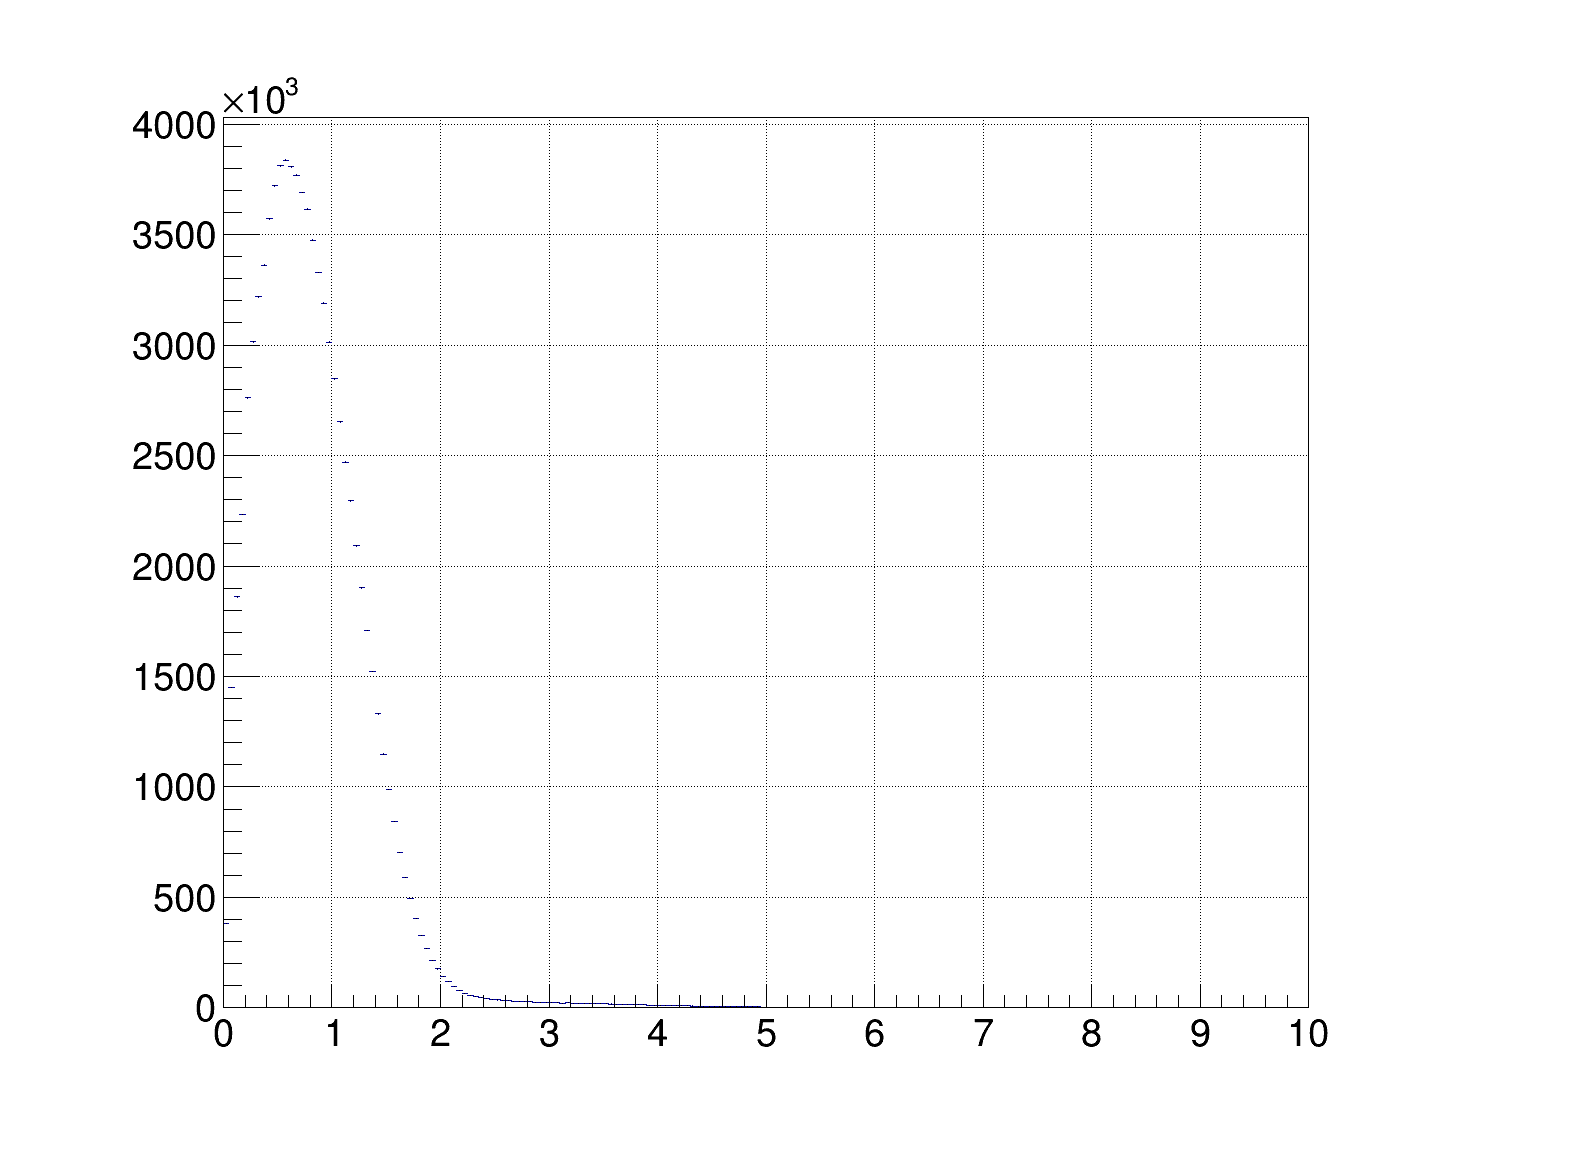

In [26]:
h_expskin_0.Draw()
c1.Draw()